In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
import warnings
from matplotlib.pyplot import acorr
warnings.warn('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

/home/shreya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: ignore
  app.launch_new_instance()


In [2]:
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# Problem Statement:
Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [3]:
stocks = ['DATE', 'NASDAQ.AAPL', 'NASDAQ.ADP', 'NASDAQ.CBOE', 'NASDAQ.CSCO', 'NASDAQ.EBAY']
df1 = df[stocks]
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1491226200,143.6800,102.2300,81.03,33.7400,33.3975
1,1491226260,143.7000,102.1400,81.21,33.8800,33.3950
2,1491226320,143.6901,102.2125,81.21,33.9000,33.4100
3,1491226380,143.6400,102.1400,81.13,33.8499,33.3350
4,1491226440,143.6600,102.0600,81.12,33.8400,33.4000


In [4]:
df1.isnull().sum()

DATE           0
NASDAQ.AAPL    0
NASDAQ.ADP     0
NASDAQ.CBOE    0
NASDAQ.CSCO    0
NASDAQ.EBAY    0
dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Data columns (total 6 columns):
DATE           41266 non-null int64
NASDAQ.AAPL    41266 non-null float64
NASDAQ.ADP     41266 non-null float64
NASDAQ.CBOE    41266 non-null float64
NASDAQ.CSCO    41266 non-null float64
NASDAQ.EBAY    41266 non-null float64
dtypes: float64(5), int64(1)
memory usage: 1.9 MB


In [6]:
df1['DATE'] = pd.to_datetime(df1['DATE'], unit='s')
df1.head()

/home/shreya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [7]:
df1['Date'] = df1['DATE'].dt.date 

/home/shreya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY,Date
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975,2017-04-03
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950,2017-04-03
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100,2017-04-03
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350,2017-04-03
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000,2017-04-03


In [9]:
df1.nunique()

DATE           41266
NASDAQ.AAPL    13244
NASDAQ.ADP      6123
NASDAQ.CBOE     4592
NASDAQ.CSCO     5805
NASDAQ.EBAY     3061
Date             106
dtype: int64

## NASDAQ.EBAY

In [10]:
df_AAPL = df1[['NASDAQ.AAPL', 'Date']]
df_AAPL.shape
df_AAPL.set_index('Date', inplace=True)

In [11]:
df_AAPL.head(10)

,NASDAQ.AAPL
Date,
2017-04-03,143.6800
2017-04-03,143.7000
2017-04-03,143.6901
2017-04-03,143.6400
2017-04-03,143.6600
2017-04-03,143.7800
2017-04-03,143.8640
2017-04-03,143.8100
2017-04-03,143.8150


In [12]:
df_AAPL.describe()

,NASDAQ.AAPL
count,41266.000000
mean,150.453566
std,6.236826
min,140.160000
25%,144.640000
50%,149.945000
75%,155.065000
max,164.510000


In [13]:
#Dropping null values
df_AAPL.isna().sum()
df_AAPL.dropna(inplace=True)

/home/shreya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/home/shreya/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


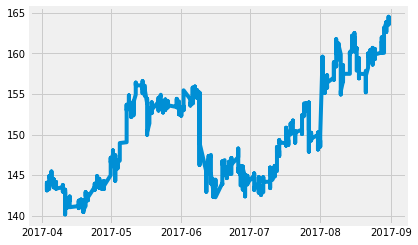

In [14]:
# EDA
plt.plot(df_AAPL)

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

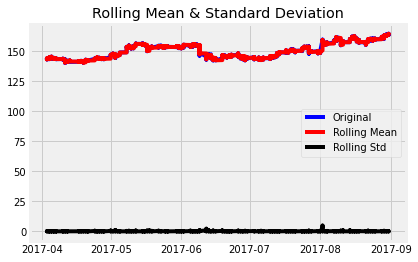

Results of Dickey-Fuller Test:
Test Statistic                    -0.912853
p-value                            0.783710
#Lags Used                        31.000000
Number of Observations Used    41234.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [16]:
test_stationarity(df_AAPL)

Since test statistic is greater than critical value we cannot reject null hypothesis

In [17]:
# Creating new feature
df_AAPL = df_AAPL.copy()
df_AAPL['First Difference'] = df_AAPL['NASDAQ.AAPL'] - df_AAPL['NASDAQ.AAPL'].shift(1)

In [18]:
# Dropping null values
df_AAPL.dropna(inplace=True)

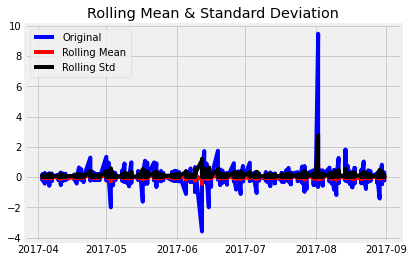

Results of Dickey-Fuller Test:
Test Statistic                   -35.737741
p-value                            0.000000
#Lags Used                        30.000000
Number of Observations Used    41234.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [19]:
test_stationarity(df_AAPL['First Difference'])

Since test statistic is less than critical value we can reject null hypothesis

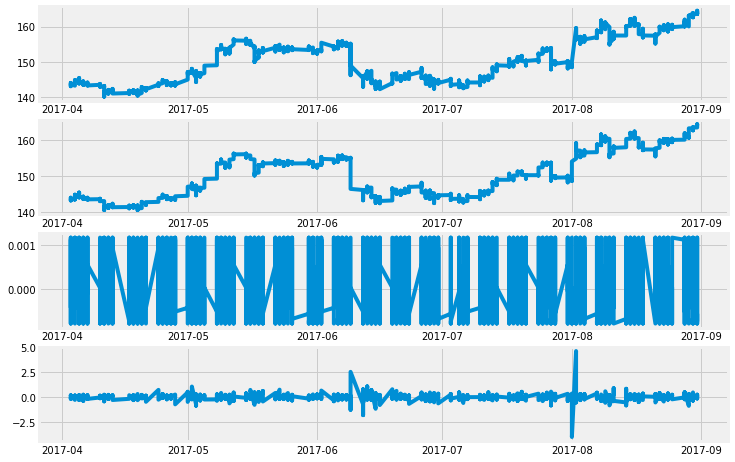

In [20]:
#Decomposing 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_AAPL['NASDAQ.AAPL'], period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(11, 8))
#Plotting original
plt.subplot(411)
plt.plot(df_AAPL['NASDAQ.AAPL'], label='Original')
#Plotting trend
plt.subplot(412)
plt.plot(trend, label='Trend')
#Plotting Seasonal
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
#Plotting residual
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.show()

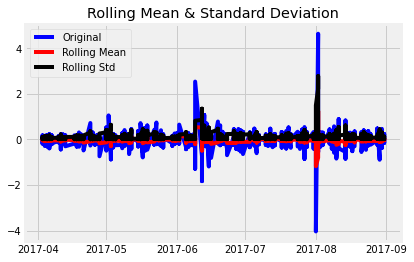

Results of Dickey-Fuller Test:
Test Statistic                   -43.043434
p-value                            0.000000
#Lags Used                        55.000000
Number of Observations Used    41197.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [21]:
ts_log = residual
ts_log.dropna(inplace=True)
test_stationarity(ts_log)

/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


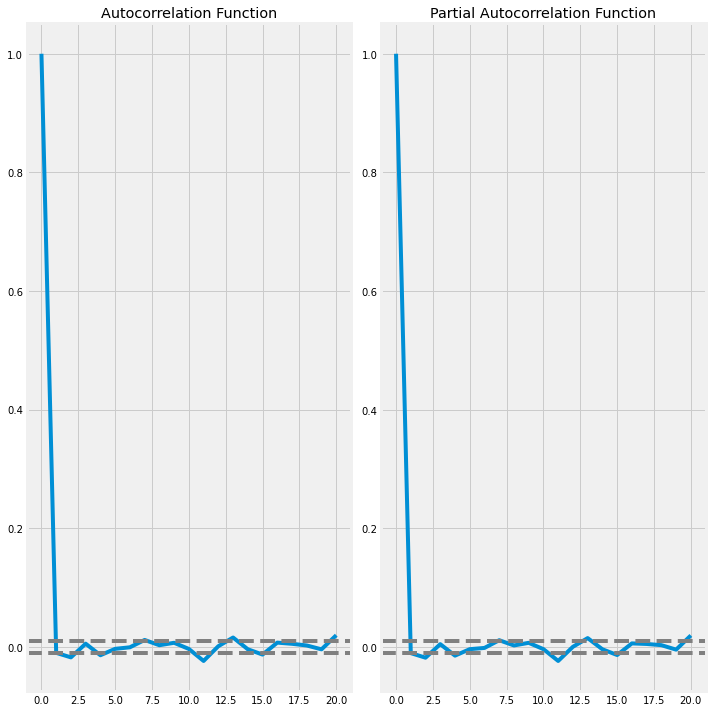

In [22]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_AAPL['First Difference'], nlags=20)
lag_pacf = pacf(df_AAPL['First Difference'], nlags=20, method='ols')

plt.figure(figsize=(10, 10))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First Difference'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_AAPL['First Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First Difference'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_AAPL['First Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [23]:
#Since the first time PACF graph crosses the upper confidence interval is close to zero we take p as 0
#Since the first time ACF graph crosses the upper confidence interval is close to zero we take q as 0

### Model Fitting

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df_AAPL['NASDAQ.AAPL'], order=(0, 1, 0), seasonal_order=(0, 1, 0, 12))
results = model.fit()
print(results.summary())

/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                        NASDAQ.AAPL   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               24925.552
Date:                            Mon, 26 Oct 2020   AIC                         -49849.104
Time:                                    21:46:43   BIC                         -49840.476
Sample:                                         0   HQIC                        -49846.377
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0175   4.57e-06   3828.763      0.000       0.017       0.017
Ljung-Box (Q):                    1

In [25]:
df_AAPL['predict'] = results.predict()
df_AAPL.head()

,NASDAQ.AAPL,First Difference,predict
Date,,,
2017-04-03,143.7000,0.0200,0.0000
2017-04-03,143.6901,-0.0099,143.7000
2017-04-03,143.6400,-0.0501,143.6901
2017-04-03,143.6600,0.0200,143.6400
2017-04-03,143.7800,0.1200,143.6600


<AxesSubplot:xlabel='Date'>

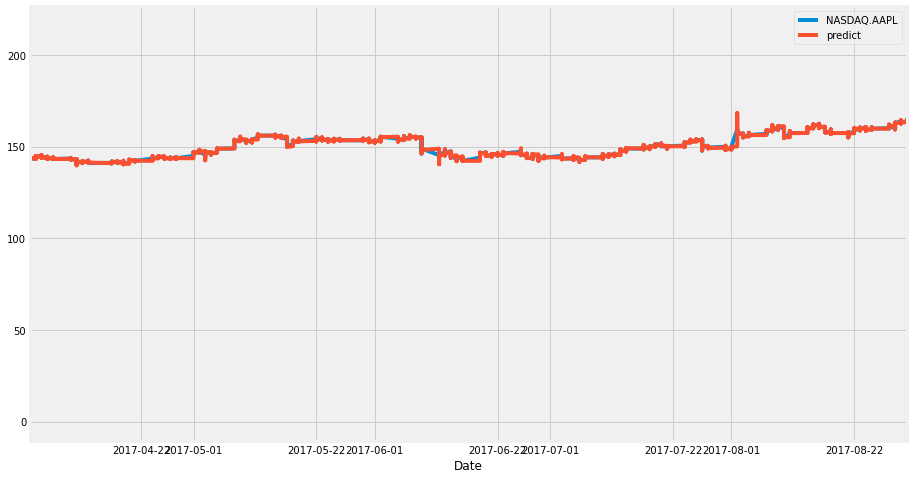

In [26]:
#Plot actual vs predicted
df_AAPL[['NASDAQ.AAPL', 'predict']].plot(figsize=(14, 8))

In [27]:
#Future forecast
results.forecast(10)

/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    163.960
41266    163.935
41267    163.910
41268    163.810
41269    163.940
41270    163.950
41271    163.890
41272    163.860
41273    163.870
41274    163.760
dtype: float64

### Checking errors

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Squared Error is:', mean_squared_error(df_AAPL['NASDAQ.AAPL'], df_AAPL['predict']))
print('Mean Absolute Error is:', mean_absolute_error(df_AAPL['NASDAQ.AAPL'], df_AAPL['predict']))

Mean Squared Error is: 0.6426408212212156
Mean Absolute Error is: 0.07550728219882943


## NASDAQ.ADP

In [29]:
df_ADP = df1[['NASDAQ.ADP', 'Date']]
df_ADP.shape
df_ADP.set_index('Date', inplace=True)
df_ADP.head(10)

,NASDAQ.ADP
Date,
2017-04-03,102.2300
2017-04-03,102.1400
2017-04-03,102.2125
2017-04-03,102.1400
2017-04-03,102.0600
2017-04-03,102.0400
2017-04-03,102.3300
2017-04-03,102.3700
2017-04-03,102.3800


In [30]:
#Dropping null values
df_ADP.isna().sum()
df_ADP.dropna(inplace=True)
df_ADP.describe()

/home/shreya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,NASDAQ.ADP
count,41266.000000
mean,103.480398
std,4.424244
min,95.870000
25%,101.300000
50%,102.440000
75%,104.660000
max,121.770000


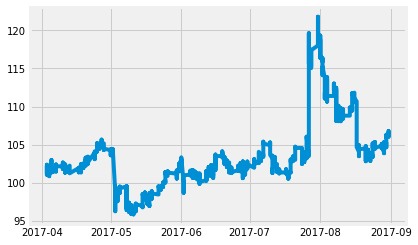

In [31]:
#PLotting
plt.plot(df_ADP)

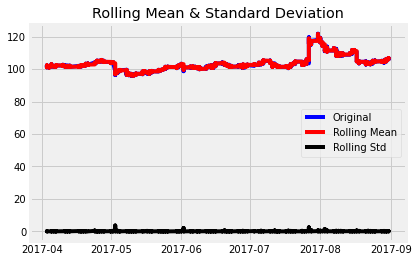

Results of Dickey-Fuller Test:
Test Statistic                    -1.704174
p-value                            0.428963
#Lags Used                        39.000000
Number of Observations Used    41226.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [32]:
test_stationarity(df_ADP)

In [33]:
#Since test statistic is greater than critical value we cannot reject null hypothesis

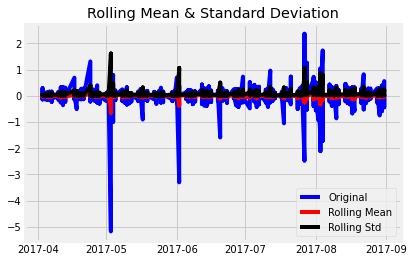

Results of Dickey-Fuller Test:
Test Statistic                   -31.055662
p-value                            0.000000
#Lags Used                        38.000000
Number of Observations Used    41226.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [34]:
df_ADP = df_ADP.copy()
df_ADP['First Difference'] = df_ADP['NASDAQ.ADP'] - df_ADP['NASDAQ.ADP'].shift(1)
df_ADP.dropna(inplace=True)
test_stationarity(df_ADP['First Difference'])

In [35]:
#Since test statistic is less than critical value we can reject null hypothesis

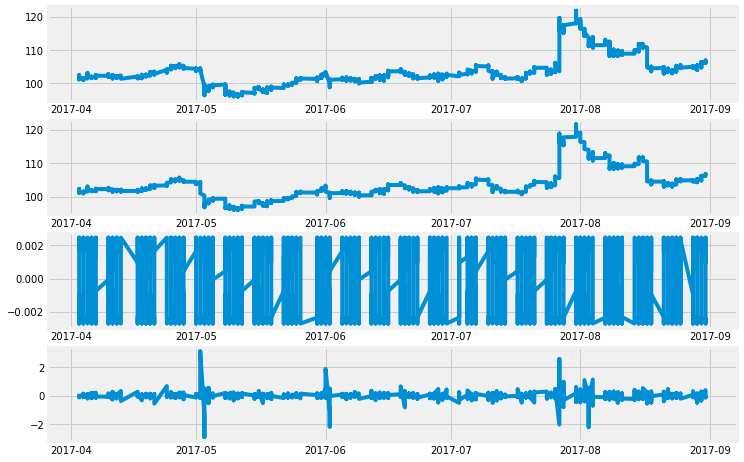

In [36]:
decomposition = seasonal_decompose(df_ADP['NASDAQ.ADP'], period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(11, 8))
# Plot original
plt.subplot(411)
plt.plot(df_ADP['NASDAQ.ADP'], label='Original')
#plot trend
plt.subplot(412)
plt.plot(trend, label='Trend')
#plot seasonal
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
#plot residual
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.show()

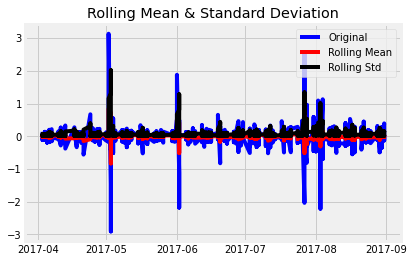

Results of Dickey-Fuller Test:
Test Statistic                   -45.947099
p-value                            0.000000
#Lags Used                        55.000000
Number of Observations Used    41197.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [37]:
ts_log = residual
ts_log.dropna(inplace=True)
test_stationarity(ts_log)

In [38]:
#Since test statistic is less than critical value we can reject null hypothesis

/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


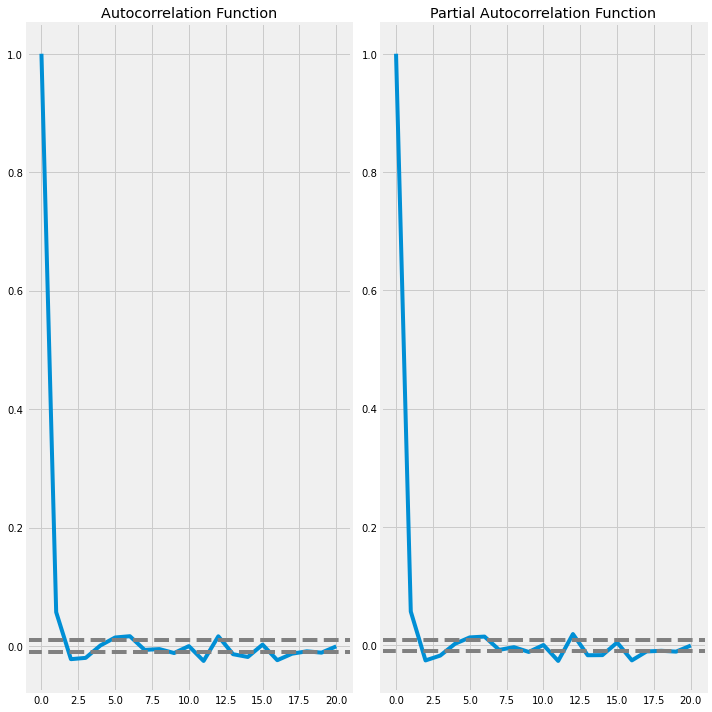

In [39]:
lag_acf = acf(df_ADP['First Difference'], nlags=20)
lag_pacf = pacf(df_ADP['First Difference'], nlags=20, method='ols')

plt.figure(figsize=(10, 10))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=-1.96/np.sqrt(len(df_ADP['First Difference'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_ADP['First Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=-1.96/np.sqrt(len(df_ADP['First Difference'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_ADP['First Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [40]:
#Since the first time PACF graph crosses the upper confidence interval is close to zero we take p as 0
#Since the first time ACF graph crosses the upper confidence interval is close to zero we take q as 0

### Model fitting

In [41]:
model = SARIMAX(df_ADP['NASDAQ.ADP'], order=(0, 1, 0), seasonal_order=(0, 1, 0, 12))
results = model.fit()
print(results.summary())

/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                         NASDAQ.ADP   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               34733.013
Date:                            Mon, 26 Oct 2020   AIC                         -69464.026
Time:                                    21:47:25   BIC                         -69455.398
Sample:                                         0   HQIC                        -69461.299
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0109   5.34e-06   2036.711      0.000       0.011       0.011
Ljung-Box (Q):                    1

<AxesSubplot:xlabel='Date'>

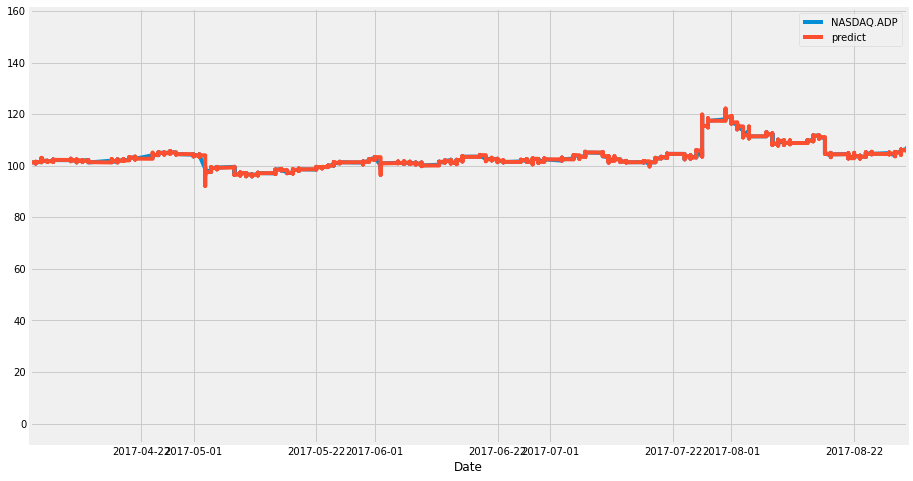

In [42]:
#Plot actual vs predicted
df_ADP['predict'] = results.predict()
df_ADP.head()
df_ADP[['NASDAQ.ADP', 'predict']].plot(figsize=(14, 8))

In [43]:
results.forecast(10)

/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    106.470
41266    106.470
41267    106.440
41268    106.380
41269    106.440
41270    106.420
41271    106.450
41272    106.385
41273    106.410
41274    106.340
dtype: float64

### Chexking for errors

In [44]:
print('Mean Squared Error is:', mean_squared_error(df_ADP['NASDAQ.ADP'], df_ADP['predict']))
print('Mean Absolute Error is:', mean_absolute_error(df_ADP['NASDAQ.ADP'], df_ADP['predict']))

Mean Squared Error is: 0.3267938113034274
Mean Absolute Error is: 0.05339673818186529


## NASDAQ.CBOE

In [45]:
df_CBOE = df1[['NASDAQ.CBOE', 'Date']]
df_CBOE.shape
df_CBOE.set_index('Date', inplace=True)
df_CBOE.head(10)

,NASDAQ.CBOE
Date,
2017-04-03,81.03
2017-04-03,81.21
2017-04-03,81.21
2017-04-03,81.13
2017-04-03,81.12
2017-04-03,81.22
2017-04-03,81.16
2017-04-03,81.16
2017-04-03,81.16


In [46]:
#Dropping null values
df_CBOE.isna().sum()
df_CBOE.dropna(inplace=True)
df_CBOE.describe()

/home/shreya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,NASDAQ.CBOE
count,41266.000000
mean,89.325485
std,5.746178
min,80.000000
25%,84.140000
50%,89.315000
75%,93.850000
max,101.350000


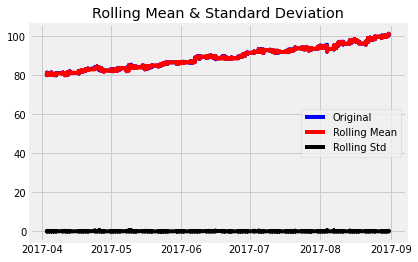

Results of Dickey-Fuller Test:
Test Statistic                     0.166339
p-value                            0.970309
#Lags Used                        27.000000
Number of Observations Used    41238.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [47]:
test_stationarity(df_CBOE)

In [48]:
#Since test statistic is greater than critical value we cannot reject null hypothesis

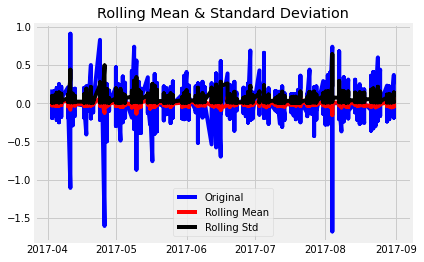

Results of Dickey-Fuller Test:
Test Statistic                   -41.642094
p-value                            0.000000
#Lags Used                        26.000000
Number of Observations Used    41238.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [49]:
df_CBOE = df_CBOE.copy()
df_CBOE['First Difference'] = df_CBOE['NASDAQ.CBOE'] - df_CBOE['NASDAQ.CBOE'].shift(1)
df_CBOE.dropna(inplace=True)
test_stationarity(df_CBOE['First Difference'])

In [50]:
#Since test statistic is less than critical value we can reject null hypothesis

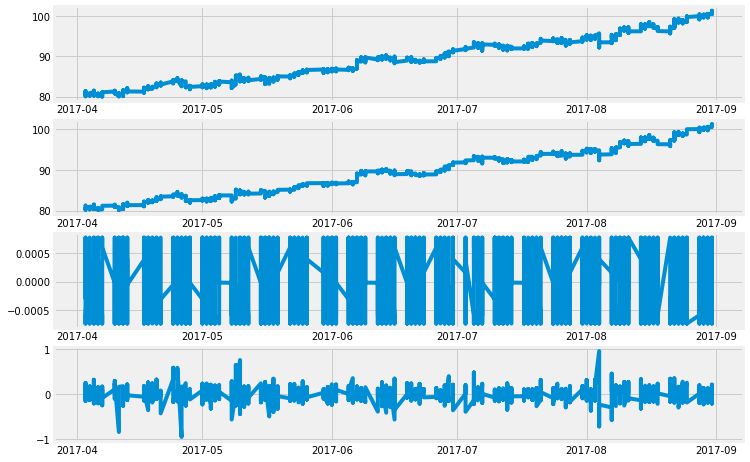

In [51]:
decomposition = seasonal_decompose(df_CBOE['NASDAQ.CBOE'], period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(11, 8))
# plot original
plt.subplot(411)
plt.plot(df_CBOE['NASDAQ.CBOE'], label='Original')
# plot trend
plt.subplot(412)
plt.plot(trend, label='Trend')
#plot seasonal
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
#plot residual
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.show()

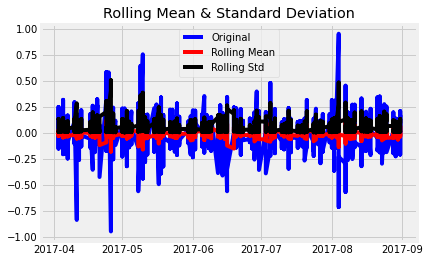

Results of Dickey-Fuller Test:
Test Statistic                   -46.216721
p-value                            0.000000
#Lags Used                        55.000000
Number of Observations Used    41197.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [52]:
ts_log = residual
ts_log.dropna(inplace=True)
test_stationarity(ts_log)

In [53]:
#Since test statistic is less than critical value we can reject null hypothesis

/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


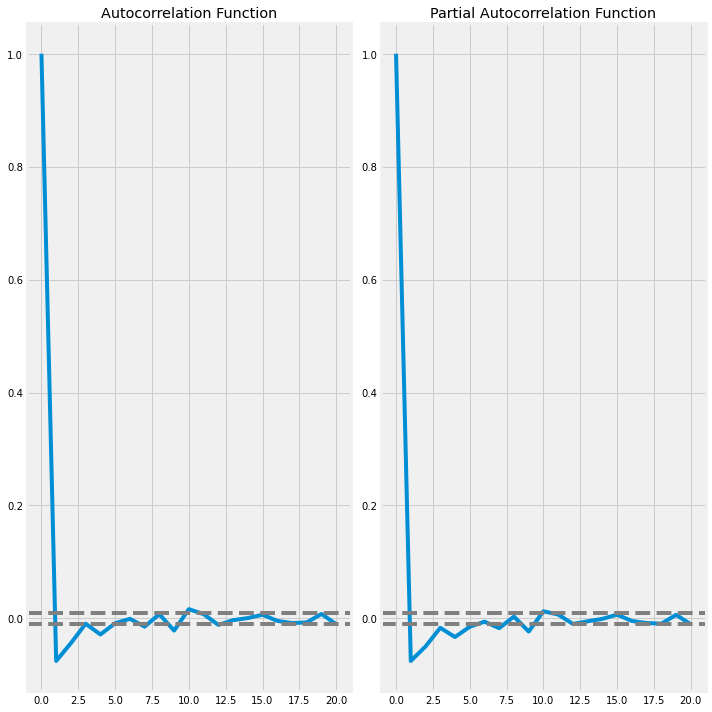

In [54]:
lag_acf = acf(df_CBOE['First Difference'], nlags=20)
lag_pacf = pacf(df_CBOE['First Difference'], nlags=20, method='ols')

plt.figure(figsize=(10, 10))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=-1.96/np.sqrt(len(df_CBOE['First Difference'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_CBOE['First Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=-1.96/np.sqrt(len(df_CBOE['First Difference'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_CBOE['First Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [55]:
#Since the first time PACF graph crosses the upper confidence interval is close to zero we take p as 0
#Since the first time ACF graph crosses the upper confidence interval is close to zero we take q as 0

### Model Fitting

In [56]:
model = SARIMAX(df_CBOE['NASDAQ.CBOE'], order=(0, 1, 0), seasonal_order=(0, 1, 0, 12))
results = model.fit()
print(results.summary())

/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                        NASDAQ.CBOE   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               53414.092
Date:                            Mon, 26 Oct 2020   AIC                        -106826.185
Time:                                    21:48:19   BIC                        -106817.557
Sample:                                         0   HQIC                       -106823.458
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0044   5.33e-06    824.257      0.000       0.004       0.004
Ljung-Box (Q):                    1

<AxesSubplot:xlabel='Date'>

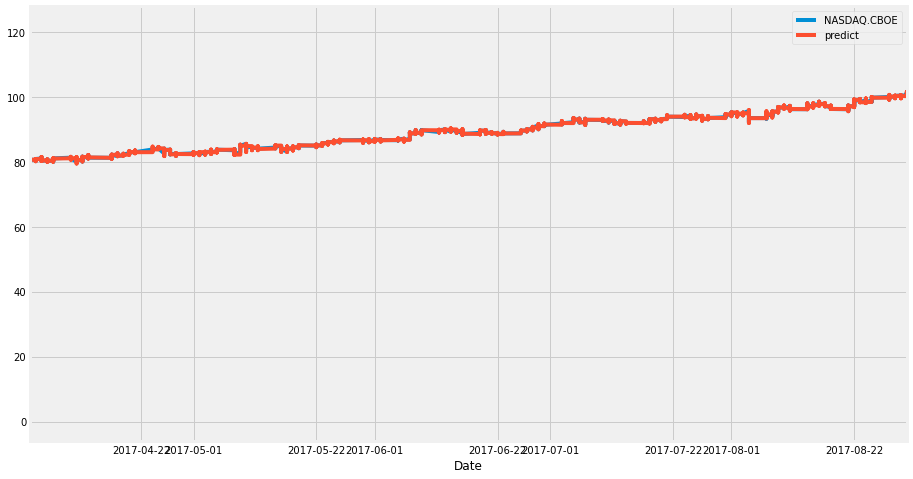

In [57]:
df_CBOE['predict'] = results.predict()
df_CBOE.head()
df_CBOE[['NASDAQ.CBOE', 'predict']].plot(figsize=(14, 8))

In [58]:
# Forecasting
results.forecast(10)

/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    100.8400
41266    100.8900
41267    100.9100
41268    100.8700
41269    100.8800
41270    100.8700
41271    100.8799
41272    100.8800
41273    100.8700
41274    100.8500
dtype: float64

### Checking for errors

In [59]:
print('Mean Squared Error is:', mean_squared_error(df_CBOE['NASDAQ.CBOE'], df_CBOE['predict']))
print('Mean Absolute Error is:', mean_absolute_error(df_CBOE['NASDAQ.CBOE'], df_CBOE['predict']))

Mean Squared Error is: 0.20399400190182929
Mean Absolute Error is: 0.043566305328161276


## NASDAQ.CSCO

In [60]:
df_CSCO = df1[['NASDAQ.CSCO', 'Date']]
df_CSCO.shape
df_CSCO.set_index('Date', inplace=True)
df_CSCO.head(10)

,NASDAQ.CSCO
Date,
2017-04-03,33.7400
2017-04-03,33.8800
2017-04-03,33.9000
2017-04-03,33.8499
2017-04-03,33.8400
2017-04-03,33.8800
2017-04-03,33.9000
2017-04-03,33.8900
2017-04-03,33.9200


In [61]:
# Dropping null values
df_CSCO.isna().sum()
df_CSCO.dropna(inplace=True)
df_CSCO.describe()

/home/shreya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,NASDAQ.CSCO
count,41266.000000
mean,32.139336
std,0.985571
min,30.365000
25%,31.455000
50%,31.773300
75%,32.790000
max,34.490000


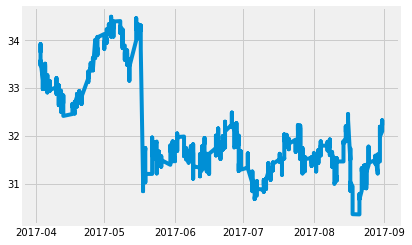

In [62]:
plt.plot(df_CSCO)

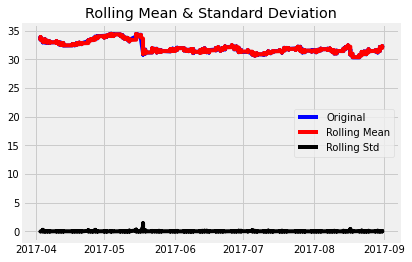

Results of Dickey-Fuller Test:
Test Statistic                    -2.395555
p-value                            0.142995
#Lags Used                        47.000000
Number of Observations Used    41218.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [63]:
test_stationarity(df_CSCO)

In [64]:
#Since test statistic is greater than critical value we cannot reject null hypothesis

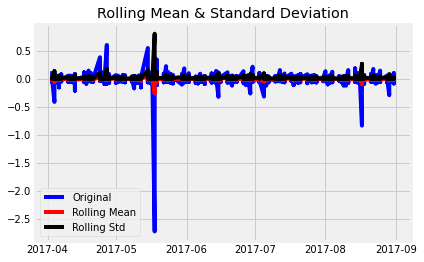

Results of Dickey-Fuller Test:
Test Statistic                   -30.356683
p-value                            0.000000
#Lags Used                        46.000000
Number of Observations Used    41218.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [65]:
df_CSCO = df_CSCO.copy()
df_CSCO['First Difference'] = df_CSCO['NASDAQ.CSCO'] - df_CSCO['NASDAQ.CSCO'].shift(1)
df_CSCO.dropna(inplace=True)
test_stationarity(df_CSCO['First Difference'])

In [66]:
#Since test statistic is less than critical value we can reject null hypothesis

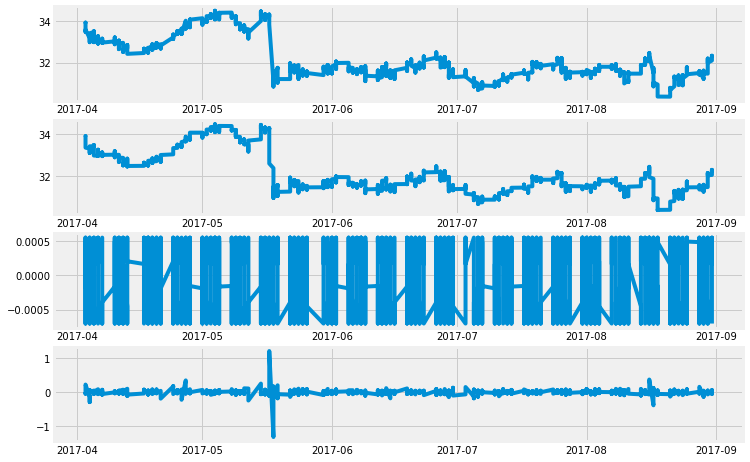

In [67]:
decomposition = seasonal_decompose(df_CSCO['NASDAQ.CSCO'], period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(11, 8))
# Plot original
plt.subplot(411)
plt.plot(df_CSCO['NASDAQ.CSCO'], label='Original')
# PLot trend
plt.subplot(412)
plt.plot(trend, label='Trend')
# Plot seasona;
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
# Plot residual
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.show()

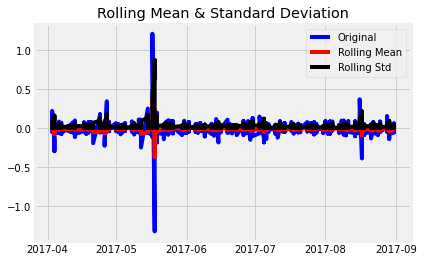

Results of Dickey-Fuller Test:
Test Statistic                   -43.945178
p-value                            0.000000
#Lags Used                        55.000000
Number of Observations Used    41197.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [68]:
ts_log = residual
ts_log.dropna(inplace=True)
test_stationarity(ts_log)

In [69]:
#Since test statistic is less than critical value we can reject null hypothesis

/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


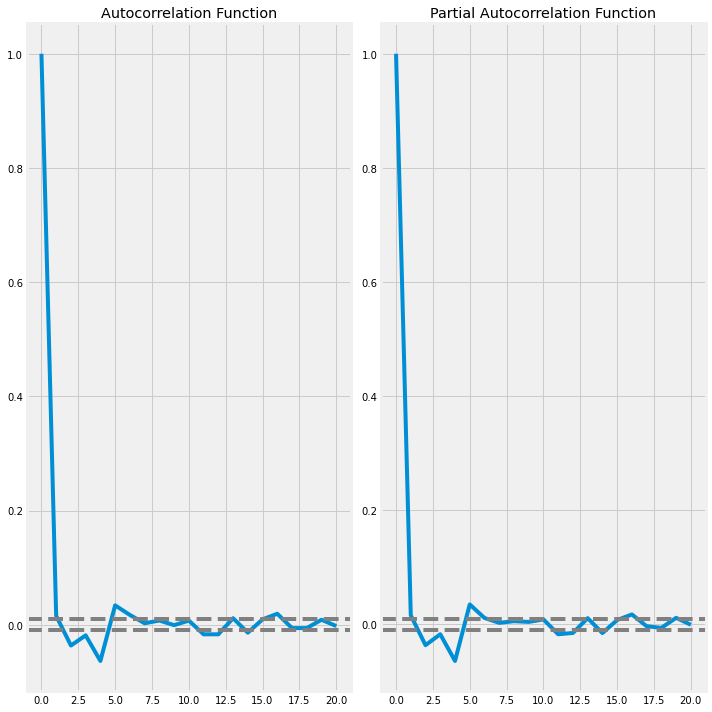

In [70]:
lag_acf = acf(df_CSCO['First Difference'], nlags=20)
lag_pacf = pacf(df_CSCO['First Difference'], nlags=20, method='ols')

plt.figure(figsize=(10, 10))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=-1.96/np.sqrt(len(df_CSCO['First Difference'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_CSCO['First Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=-1.96/np.sqrt(len(df_CSCO['First Difference'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_CSCO['First Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [71]:
#Since the first time PACF graph crosses the upper confidence interval is close to zero we take p as 0
#Since the first time ACF graph crosses the upper confidence interval is close to zero we take q as 0

### Model Fitting

In [72]:
model = SARIMAX(df_CSCO['NASDAQ.CSCO'], order=(0, 1, 0), seasonal_order=(0, 1, 0, 12))
results = model.fit()
print(results.summary())

/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                        NASDAQ.CSCO   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               85502.595
Date:                            Mon, 26 Oct 2020   AIC                        -171003.190
Time:                                    21:49:03   BIC                        -170994.563
Sample:                                         0   HQIC                       -171000.463
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0009   1.54e-07   6012.819      0.000       0.001       0.001
Ljung-Box (Q):                    1

<AxesSubplot:xlabel='Date'>

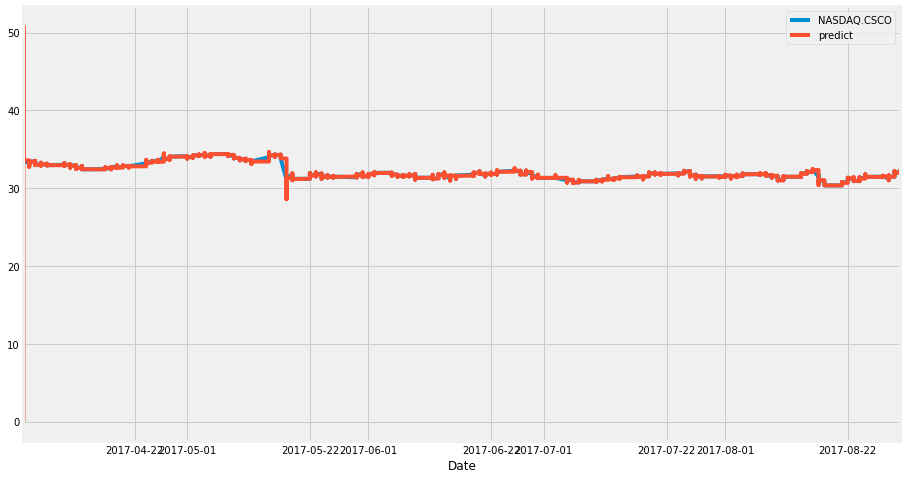

In [73]:
# Plot actul vs predicted
df_CSCO['predict'] = results.predict()
df_CSCO.head()
df_CSCO[['NASDAQ.CSCO', 'predict']].plot(figsize=(14, 8))

In [74]:
results.forecast(10)

/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    32.225
41266    32.190
41267    32.170
41268    32.150
41269    32.180
41270    32.170
41271    32.150
41272    32.165
41273    32.180
41274    32.180
dtype: float64

### Checking for errors

In [75]:
print('Mean Squared Error is:', mean_squared_error(df_CSCO['NASDAQ.CSCO'], df_CSCO['predict']))
print('Mean Absolute Error is:', mean_absolute_error(df_CSCO['NASDAQ.CSCO'], df_CSCO['predict']))

Mean Squared Error is: 0.03569378449696079
Mean Absolute Error is: 0.01577540773092907


## NASDAQ.EBAY

In [76]:
df_EBAY = df1[['NASDAQ.EBAY', 'Date']]
df_EBAY.shape
df_EBAY.set_index('Date', inplace=True)
df_EBAY.head(10)

,NASDAQ.EBAY
Date,
2017-04-03,33.3975
2017-04-03,33.3950
2017-04-03,33.4100
2017-04-03,33.3350
2017-04-03,33.4000
2017-04-03,33.4300
2017-04-03,33.4650
2017-04-03,33.5300
2017-04-03,33.5650


In [77]:
# Dropping null values
df_EBAY.isna().sum()
df_EBAY.dropna(inplace=True)
df_EBAY.describe()

/home/shreya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,NASDAQ.EBAY
count,41266.000000
mean,34.794506
std,1.099296
min,31.890000
25%,34.065000
50%,34.770000
75%,35.610000
max,37.460000


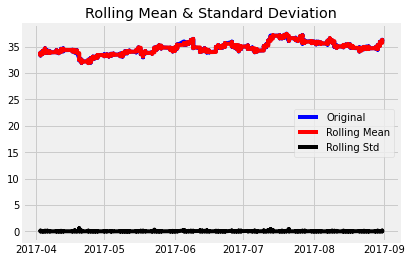

Results of Dickey-Fuller Test:
Test Statistic                    -1.875762
p-value                            0.343548
#Lags Used                        47.000000
Number of Observations Used    41218.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [78]:
test_stationarity(df_EBAY)

In [79]:
#Since test statistic is greater than critical value we cannot reject null hypothesis

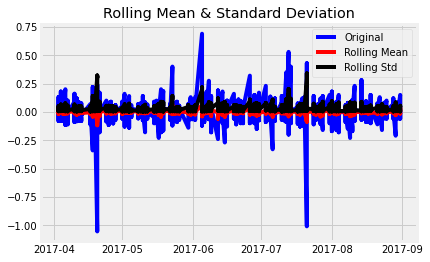

Results of Dickey-Fuller Test:
Test Statistic                   -30.679619
p-value                            0.000000
#Lags Used                        46.000000
Number of Observations Used    41218.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [80]:
df_EBAY = df_EBAY.copy()
df_EBAY['First Difference'] = df_EBAY['NASDAQ.EBAY'] - df_EBAY['NASDAQ.EBAY'].shift(1)
df_EBAY.dropna(inplace=True)
test_stationarity(df_EBAY['First Difference'])

In [81]:
#Since test statistic is less than critical value we can reject null hypothesis

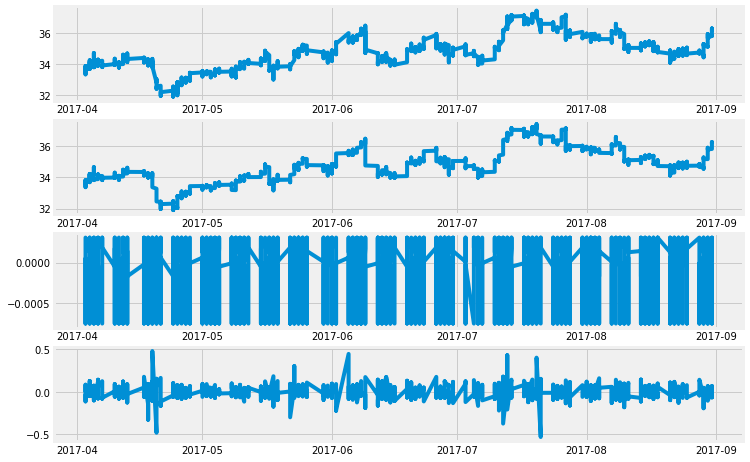

In [82]:
decomposition = seasonal_decompose(df_EBAY['NASDAQ.EBAY'], period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(11, 8))
# PLot original
plt.subplot(411)
plt.plot(df_EBAY['NASDAQ.EBAY'], label='Original')
# Plot trend
plt.subplot(412)
plt.plot(trend, label='Trend')
# Plot seasonal
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
# Plot residual
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.show()

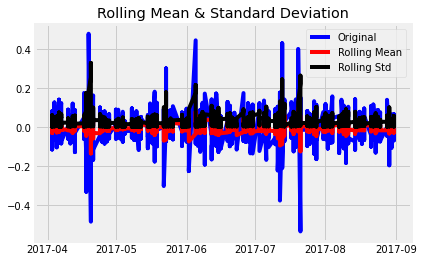

Results of Dickey-Fuller Test:
Test Statistic                   -44.880492
p-value                            0.000000
#Lags Used                        55.000000
Number of Observations Used    41197.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [83]:
ts_log = residual
ts_log.dropna(inplace=True)
test_stationarity(ts_log)

In [84]:
#Since test statistic is less than critical value we can reject null hypothesis

/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


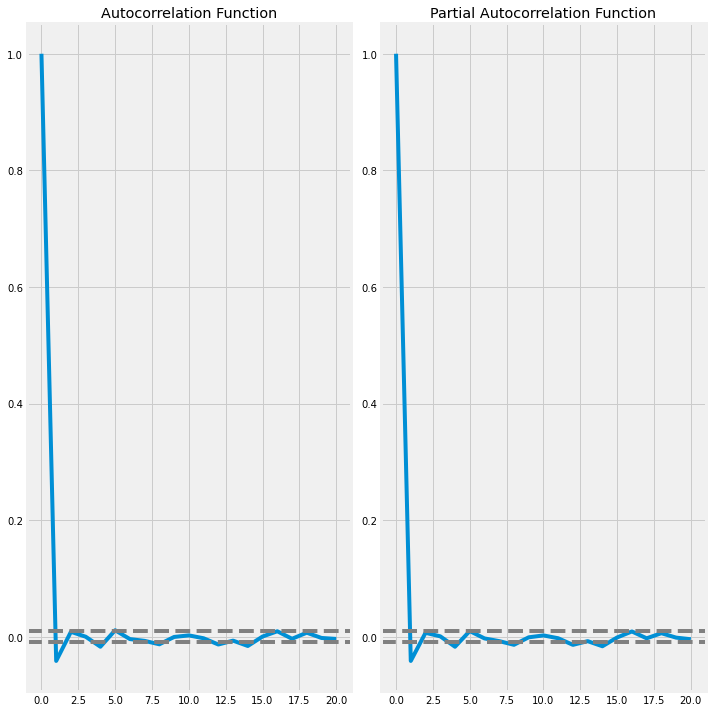

In [85]:
lag_acf = acf(df_EBAY['First Difference'], nlags=20)
lag_pacf = pacf(df_EBAY['First Difference'], nlags=20, method='ols')

plt.figure(figsize=(10, 10))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=-1.96/np.sqrt(len(df_EBAY['First Difference'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_EBAY['First Difference'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=-1.96/np.sqrt(len(df_EBAY['First Difference'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_EBAY['First Difference'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [86]:
#Since the first time PACF graph crosses the upper confidence interval is close to zero we take p as 0
#Since the first time ACF graph crosses the upper confidence interval is close to zero we take q as 0

### Model fitting

In [87]:
model = SARIMAX(df_EBAY['NASDAQ.EBAY'], order=(0, 1, 0), seasonal_order=(0, 1, 0, 12))
results = model.fit()
print(results.summary())

/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                        NASDAQ.EBAY   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               82104.712
Date:                            Mon, 26 Oct 2020   AIC                        -164207.424
Time:                                    21:49:49   BIC                        -164198.797
Sample:                                         0   HQIC                       -164204.697
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011   9.43e-07   1158.843      0.000       0.001       0.001
Ljung-Box (Q):                    1

<AxesSubplot:xlabel='Date'>

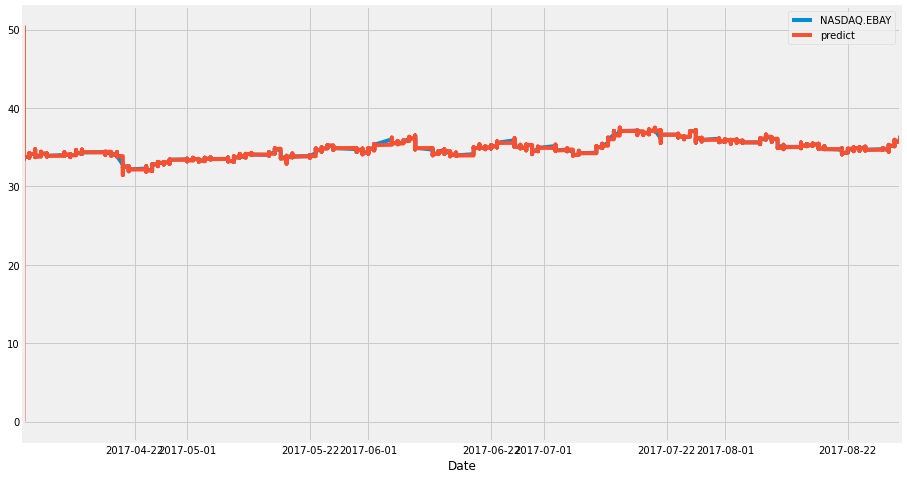

In [88]:
#Plot actual vs predicted
df_EBAY['predict'] = results.predict()
df_EBAY.head()
df_EBAY[['NASDAQ.EBAY', 'predict']].plot(figsize=(14, 8))

In [89]:
results.forecast(10)

/home/shreya/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    36.090
41266    36.030
41267    36.030
41268    36.020
41269    36.020
41270    36.025
41271    36.020
41272    36.025
41273    36.020
41274    36.020
dtype: float64

In [90]:
### Checking for errors

In [91]:
print('Mean Squared Error is:', mean_squared_error(df_EBAY['NASDAQ.EBAY'], df_EBAY['predict']))
print('Mean Absolute Error is:', mean_absolute_error(df_EBAY['NASDAQ.EBAY'], df_EBAY['predict']))

Mean Squared Error is: 0.03483567894300047
Mean Absolute Error is: 0.021688033531638957
